## Text-to-Image Generation using Stable Diffusion and Diffusers

In [1]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers gradio accelerate


[notice] A new release of pip available: 22.2.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from diffusers import StableDiffusionPipeline
from diffusers import DiffusionPipeline
import matplotlib.pyplot as plt
import torch

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\diffusers\models\transformers\transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [3]:
!pip show torch

Name: torch
Version: 2.0.1+cu117
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\admin\appdata\local\programs\python\python310\lib\site-packages
Requires: filelock, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, torchaudio, torchvision


In [3]:
model_id1 = "dreamlike-art/dreamlike-photoreal-2.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

Loading pipeline components...: 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]


In [5]:
prompt = """A cat holding light"""

In [6]:
image = pipe(prompt).images[0]

 42%|████▏     | 21/50 [03:54<05:23, 11.14s/it]


KeyboardInterrupt: 

[PROMPT]:  A cat holding light


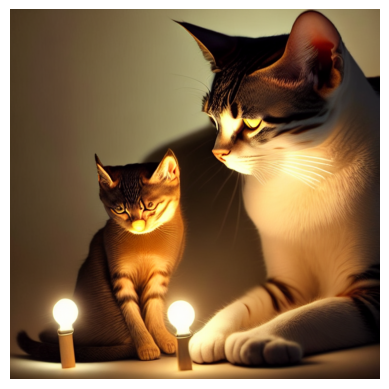

In [34]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

### Working with Stable Diffusion parameters

* Negative prompting
* num_inference_steps
* height
* weight
* num_images_per_prompt

In [35]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

  0%|          | 0/100 [00:00<?, ?it/s]

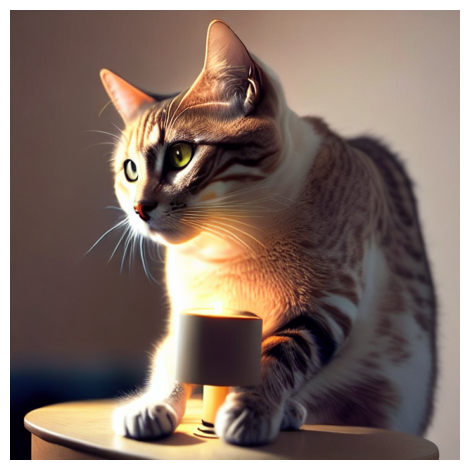

In [36]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


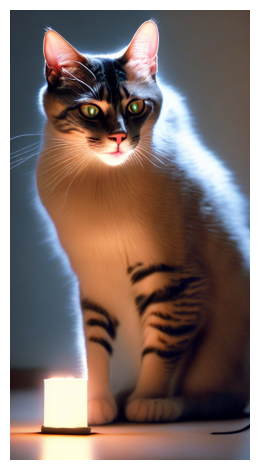

In [37]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

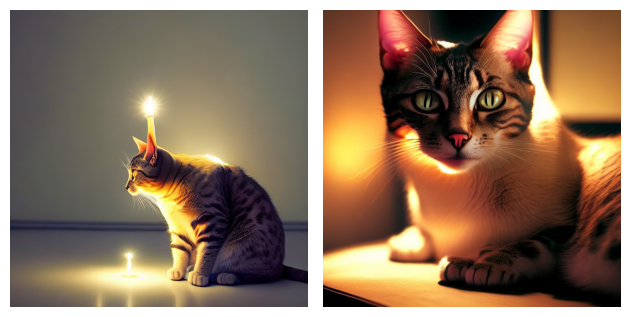

In [38]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}


generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

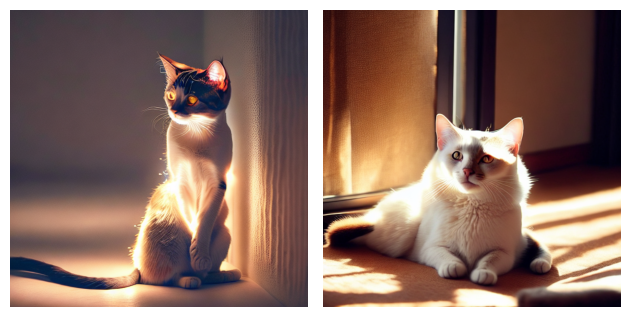

In [59]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}
negative_prompt="a cat holding light"
generate_image(pipe, prompt, params)

In [ ]:
#UI for project

In [4]:
def generate_image_interface(prompt,num_inference_steps, weight=640):
  params = {'prompt': prompt, 'num_inference_steps': num_inference_steps, 'num_images_per_prompt':2, 'height':int(1.2*weight),
            'weight': weight}

  img = pipe(**params).images
  return img[0],img[1]

In [5]:
import gradio as gr

In [7]:
demo = gr.Interface(generate_image_interface, inputs=["text","number"], outputs=["image","image"])

In [8]:
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


100%|██████████| 2/2 [00:47<00:00, 23.58s/it]
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\diffusers\image_processor.py:111: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")
